In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

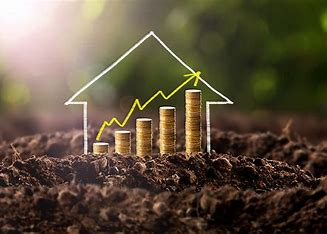

In [2]:
from IPython.display import Image,display,HTML
display(HTML("<h2>House Pricing Analysis Over The Last Decade</h2>"))
display(Image("images/House_pricing.jpg", width=600, height=500, retina=False))


In [3]:
#Import the dataset
house_pricing = pd.read_csv("data/House-pricing-advanced-regression.csv")

##### Basic Info of the dataset

In [4]:
house_pricing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
#Datatypes of each columns
house_pricing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
# Number of rows and columns in the dataframe
house_pricing.shape 

(545, 13)

In [7]:
house_pricing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
#Look for duplicate rows in the dataset
house_pricing.loc[house_pricing.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


##### Statistical Operations on Dataset

In [10]:
#Descriptive Statistics
mean_price = house_pricing['price'].mean()
median_price = house_pricing['price'].median()
std_price = house_pricing['price'].std()
var_price = house_pricing['price'].var()


In [11]:
mean_price

4766729.247706422

In [12]:
median_price

4340000.0

In [13]:
std_price

1870439.615657394

In [14]:
var_price

3498544355820.5796

In [15]:
#Data Aggregation:
avg_price_by_area = house_pricing.groupby('area')['price'].mean()
avg_price_by_area


area
1650      3150000.0
1700      1890000.0
1836      2275000.0
1905      4340000.0
1950      2835000.0
            ...    
12900     4900000.0
12944     3500000.0
13200     8365000.0
15600     5943000.0
16200    10150000.0
Name: price, Length: 284, dtype: float64

In [16]:
#Check for null values...
house_pricing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**No missing values**

### 1.Data Visualization

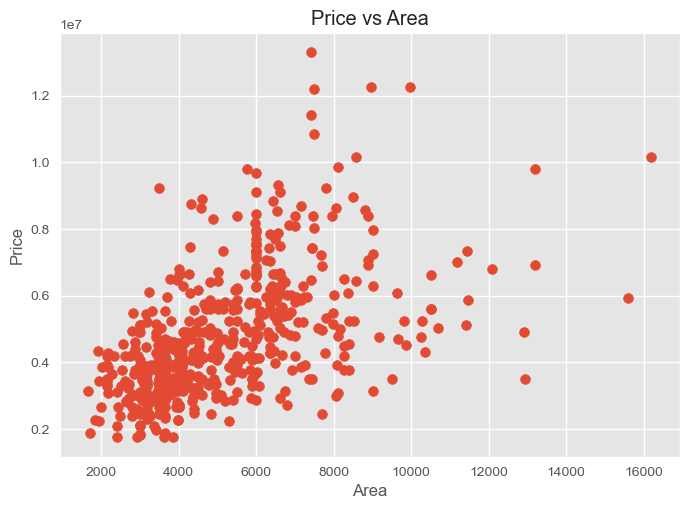

In [17]:
plt.style.use('seaborn-v0_8-whitegrid') 
plt.style.use("seaborn-v0_8")
plt.style.use('ggplot')

plt.scatter(house_pricing['area'], house_pricing['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show();

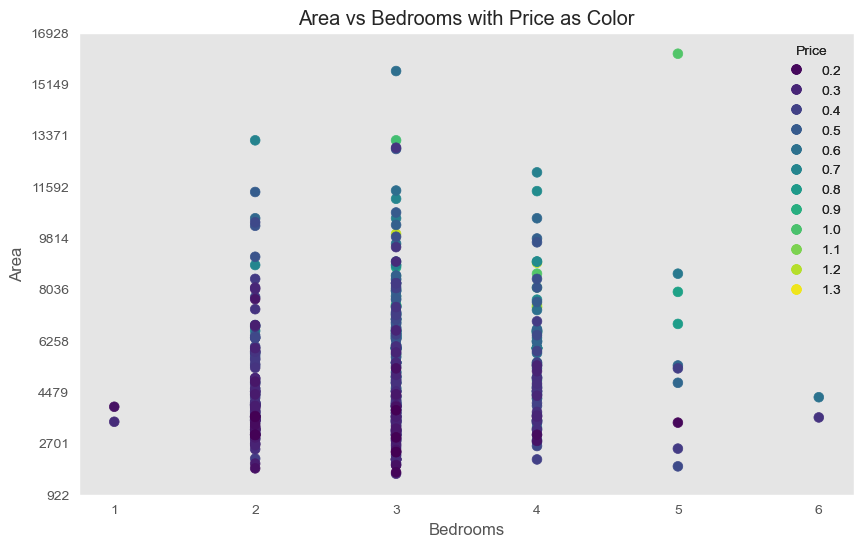

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'house_pricing' is your DataFrame and 'area', 'bedrooms', 'price' are columns in 'house_pricing'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(house_pricing["bedrooms"], house_pricing["area"], c=house_pricing["price"], cmap='viridis')

# Customize
ax.set(title="Area vs Bedrooms with Price as Color",
       xlabel="Bedrooms",
       ylabel="Area")

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Price")
ax.add_artist(legend1)

# Adding additional features
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_yticks(np.linspace(*ax.get_ybound(), 10))

plt.show();


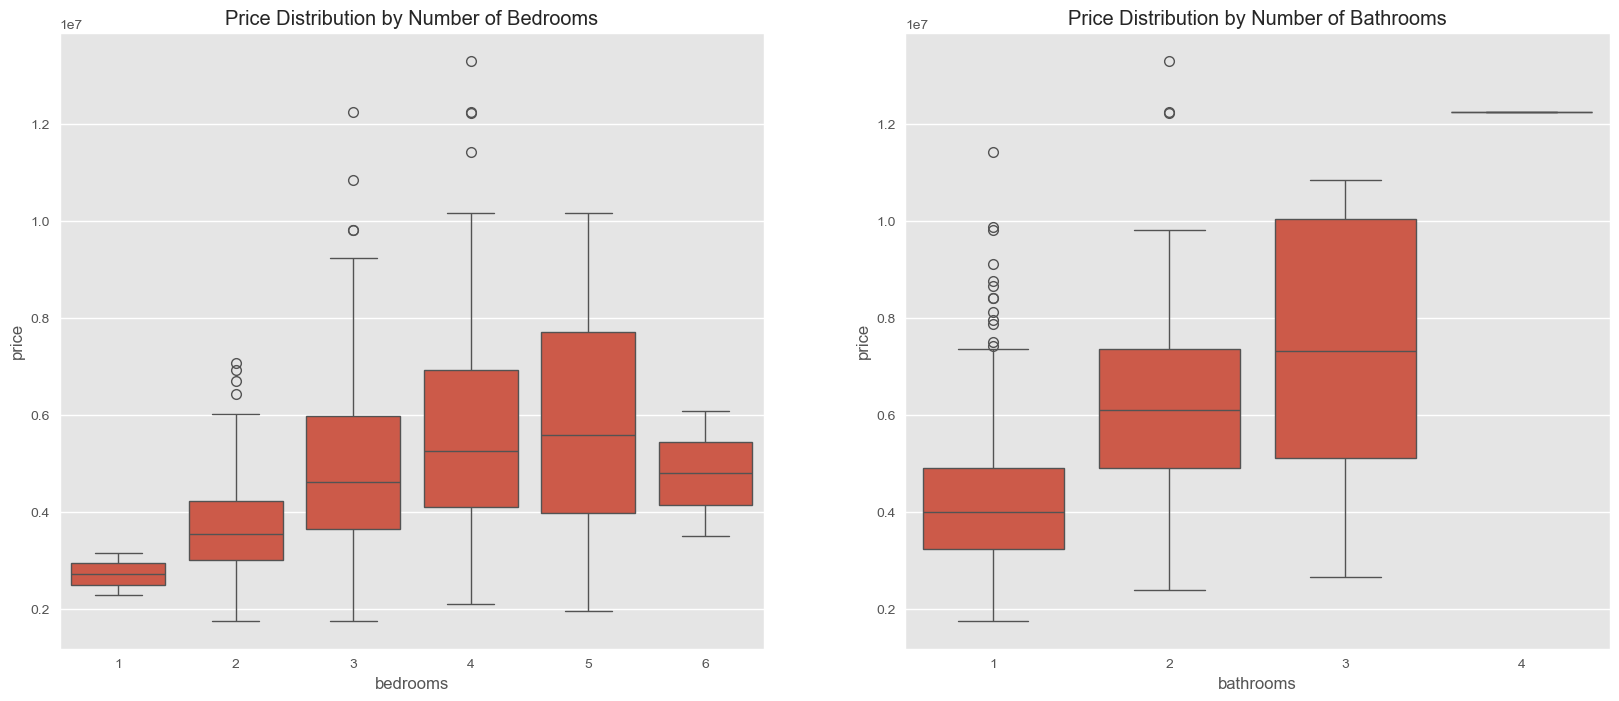

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)  #(Row-1,Column-2,First plot-1st Col)
sns.boxplot(x='bedrooms', y='price', data=house_pricing)
plt.title('Price Distribution by Number of Bedrooms')
#creates a box-plot showing the distribution of house prices for different numbers of bedrooms.

plt.subplot(1,2,2) #(Second plot-2nd Col)
sns.boxplot(x='bathrooms', y='price', data=house_pricing)
plt.title('Price Distribution by Number of Bathrooms')
#creates a box-plot showing the distribution of house prices for different numbers of bathrooms.
plt.show();

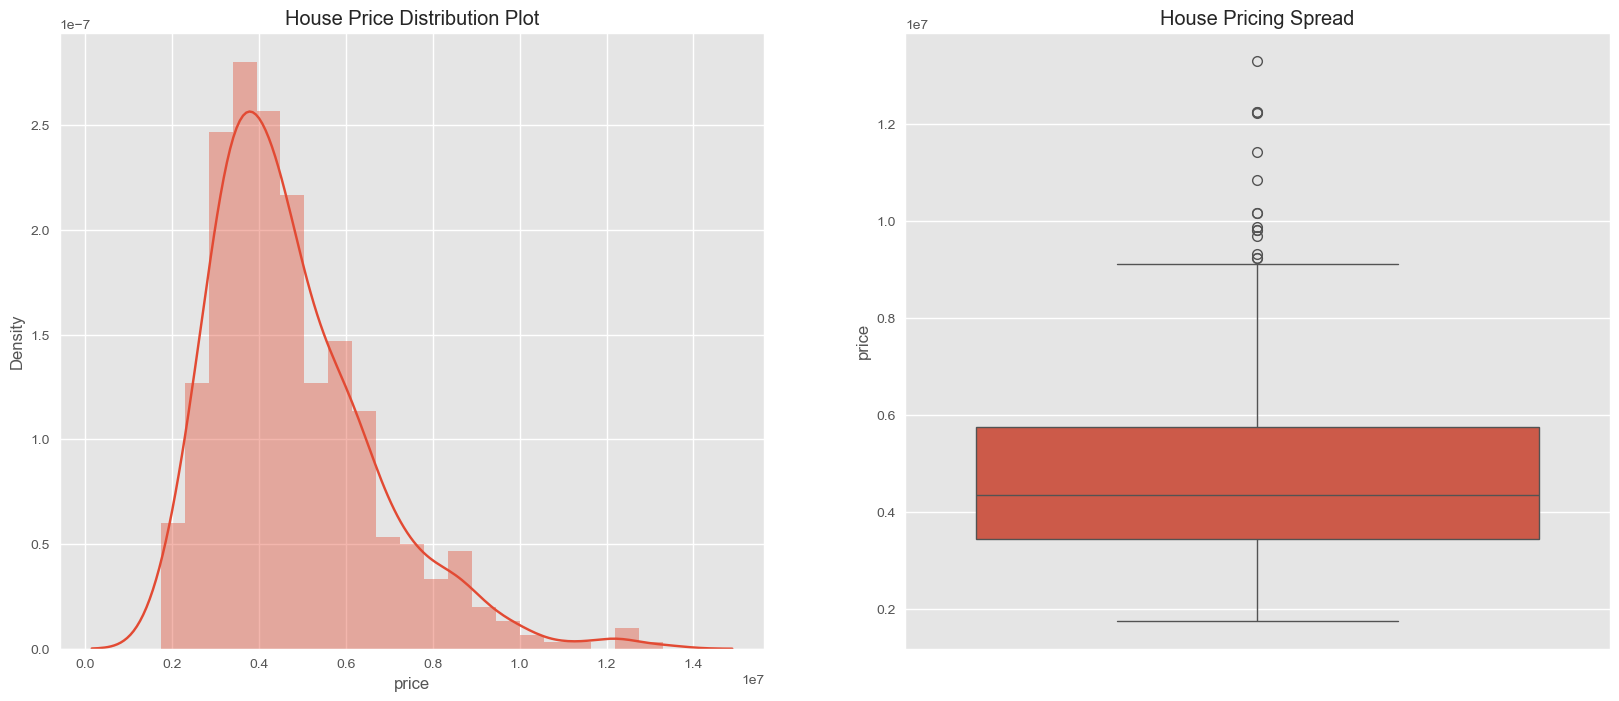

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(house_pricing.price) #creates a distribution plot (histogram with a kernel density estimate) for the price column.

plt.subplot(1,2,2)
sns.boxplot(house_pricing.price)
plt.title('House Pricing Spread')

plt.show();

**Inference:** The plot seemed to be right-skewed mildly. There is a slight difference between the mean and the median of the price distribution.

#### **Visualising Categorical Data**

In [21]:
# Create a categorical_list that contains the names of all columns in the DataFrame(house_pricing) that have a data type of 'object'...
categorical_list = [x for x in house_pricing.columns if house_pricing[x].dtype =='object']


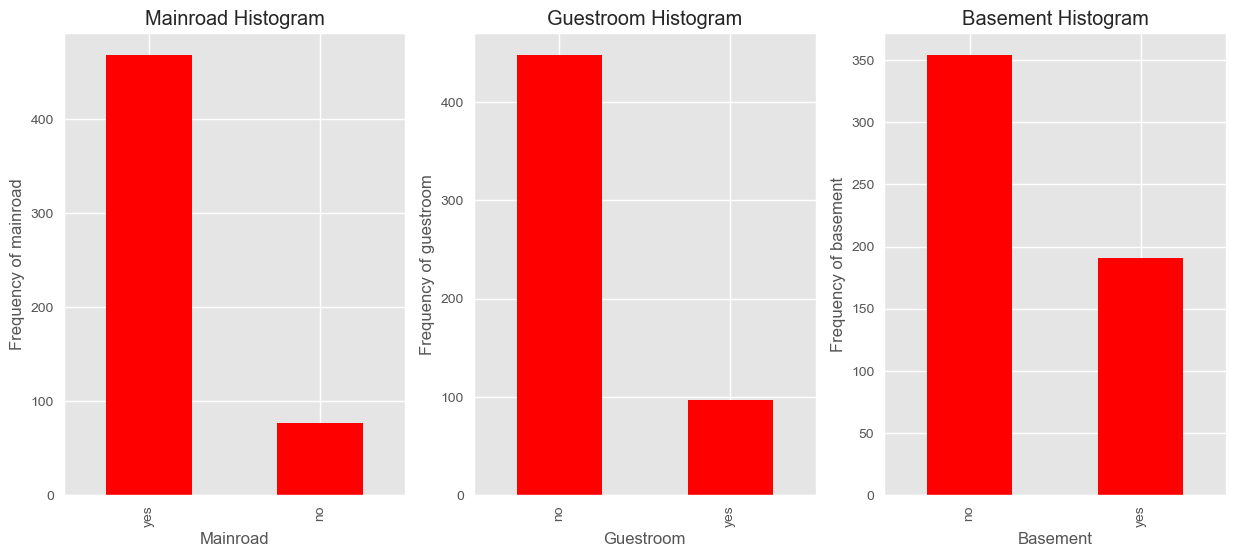

In [22]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = house_pricing['mainroad'].value_counts().plot(kind='bar',color="r")
plt.title('Mainroad Histogram')
plt1.set(xlabel = 'Mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = house_pricing['guestroom'].value_counts().plot(kind='bar',color="r")
plt.title('Guestroom Histogram')
plt1.set(xlabel = 'Guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = house_pricing['basement'].value_counts().plot(kind='bar',color="r")
plt.title('Basement Histogram')
plt1.set(xlabel = 'Basement', ylabel='Frequency of basement')

plt.show();

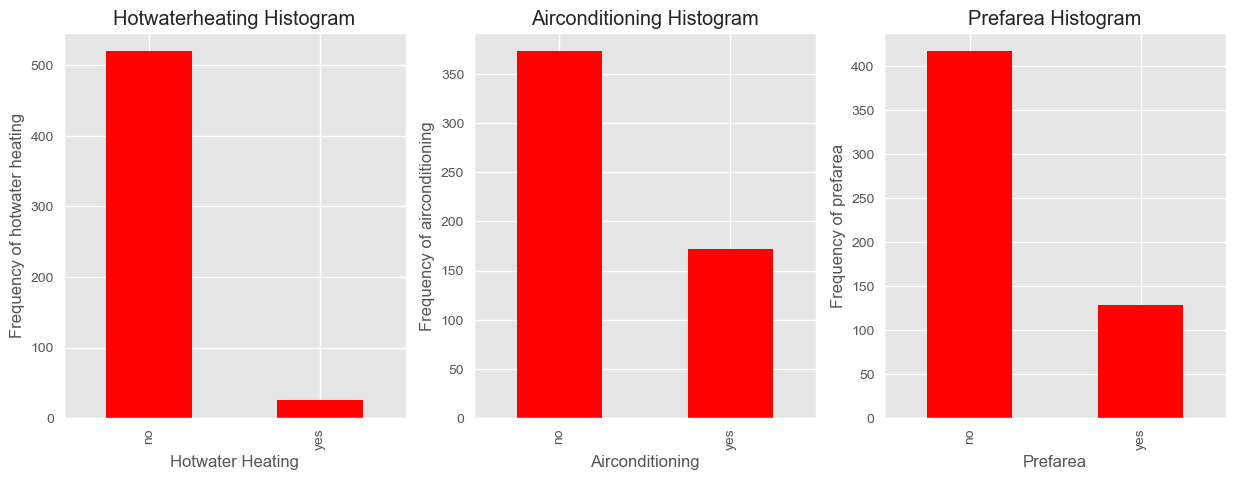

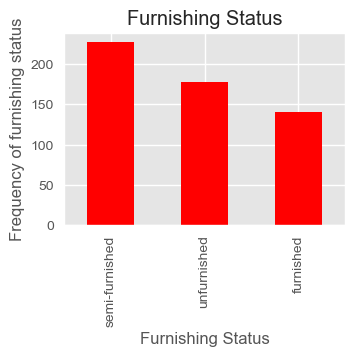

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = house_pricing['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('Hotwaterheating Histogram')
plt1.set(xlabel = 'Hotwater Heating', ylabel='Frequency of hotwater heating')

plt.subplot(1, 3, 2)
plt1 = house_pricing['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('Airconditioning Histogram')
plt1.set(xlabel = 'Airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = house_pricing['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('Prefarea Histogram')
plt1.set(xlabel = 'Prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = house_pricing['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('Furnishing Status')
plt1.set(xlabel = 'Furnishing Status', ylabel='Frequency of furnishing status')
plt.show();

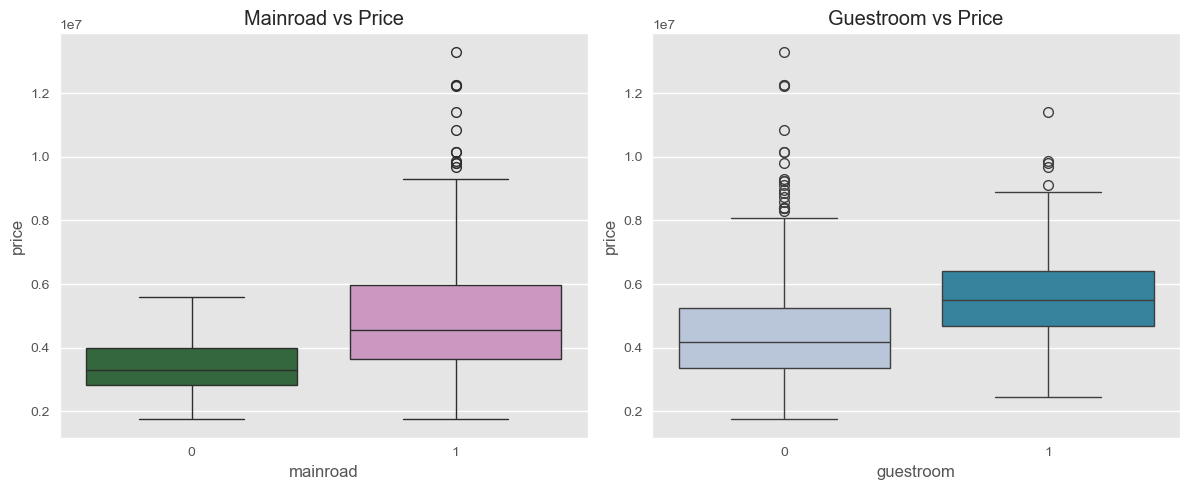

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
house_pricing = pd.read_csv("data/House-pricing-advanced-regression.csv")

# Convert categorical columns to numeric
house_pricing['mainroad'] = house_pricing['mainroad'].map({'yes': 1, 'no': 0})
house_pricing['guestroom'] = house_pricing['guestroom'].map({'yes': 1, 'no': 0})
house_pricing['basement'] = house_pricing['basement'].map({'yes': 1, 'no': 0})
house_pricing['hotwaterheating'] = house_pricing['hotwaterheating'].map({'yes': 1, 'no': 0})
house_pricing['airconditioning'] = house_pricing['airconditioning'].map({'yes': 1, 'no': 0})
house_pricing['prefarea'] = house_pricing['prefarea'].map({'yes': 1, 'no': 0})
house_pricing['furnishingstatus'] = house_pricing['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Create subplots
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Mainroad vs Price')
sns.boxplot(x='mainroad', y='price', data=house_pricing, palette="cubehelix")

plt.subplot(1, 2, 2)
plt.title('Guestroom vs Price')
sns.boxplot(x='guestroom', y='price', data=house_pricing, palette="PuBuGn")

plt.tight_layout()
plt.show();


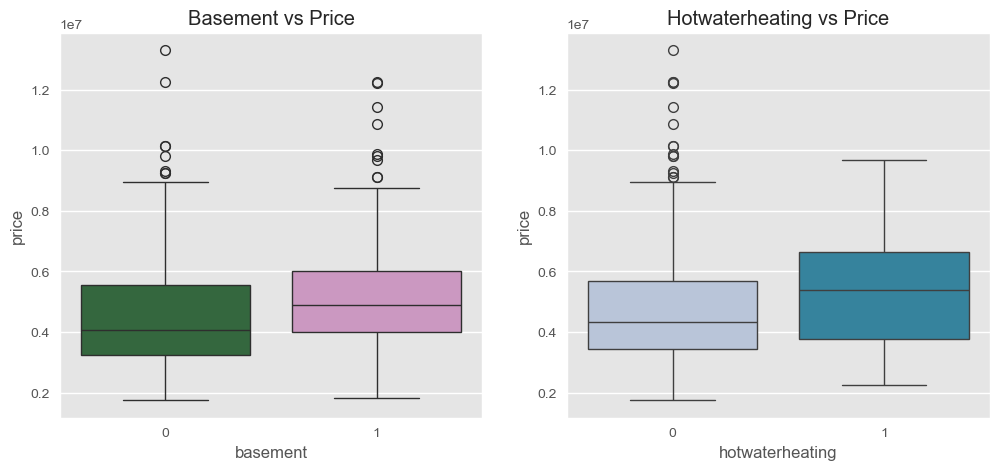

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Basement vs Price')
sns.boxplot(x=house_pricing.basement, y=house_pricing.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Hotwaterheating vs Price')
sns.boxplot(x=house_pricing.hotwaterheating, y=house_pricing.price, palette=("PuBuGn"))

plt.show()

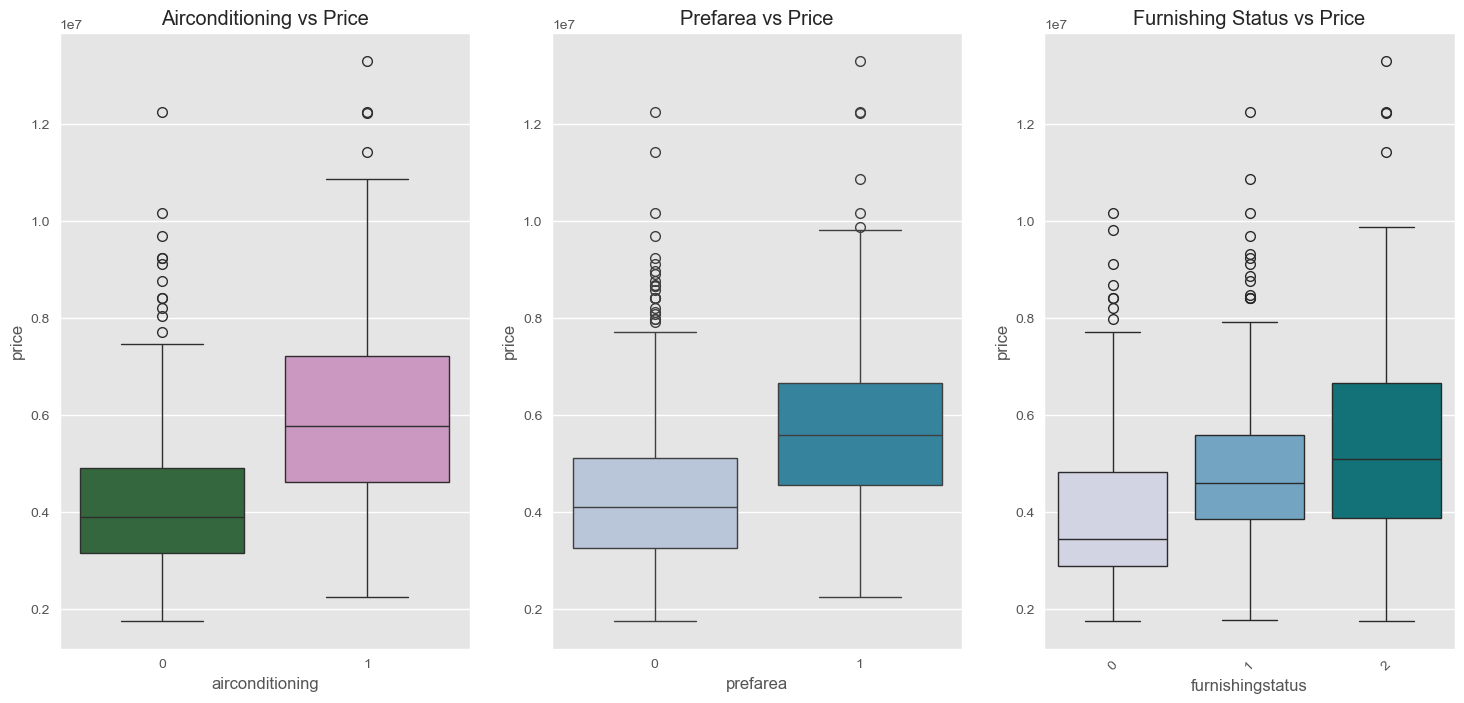

In [26]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
plt.title('Airconditioning vs Price')
sns.boxplot(x=house_pricing.airconditioning, y=house_pricing.price, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('Prefarea vs Price')
sns.boxplot(x=house_pricing.prefarea, y=house_pricing.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('Furnishing Status vs Price')
sns.boxplot(x=house_pricing.furnishingstatus, y=house_pricing.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show();

### Visualizing Numerical Data

In [27]:
#Create a numerical_list that contains the names of all columns in the DataFrame(house_pricing) that have a data type of 'int64','float64'...
numerical_list = [x for x in house_pricing.columns if house_pricing[x].dtype in ('int64','float64')]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


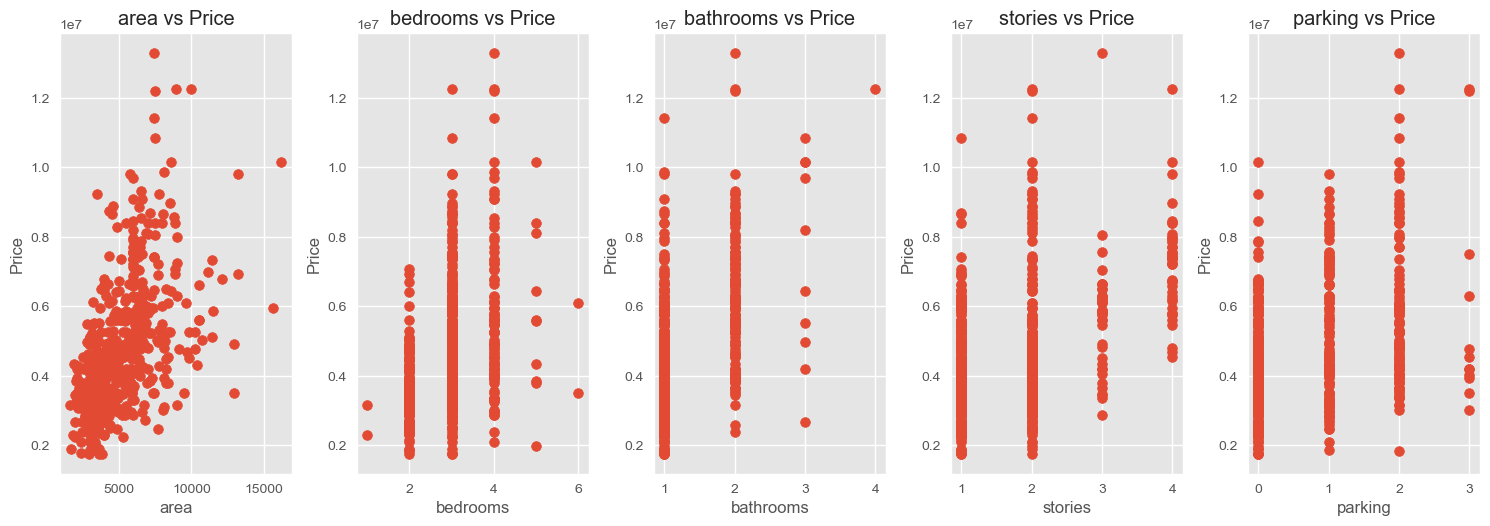

In [28]:
def scatter(x,fig):
    plt.subplot(5,5,fig)
    plt.scatter(house_pricing[x],house_pricing['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,25))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()
plt.show();

**Inference - Area has a strong positive correlation with Price**

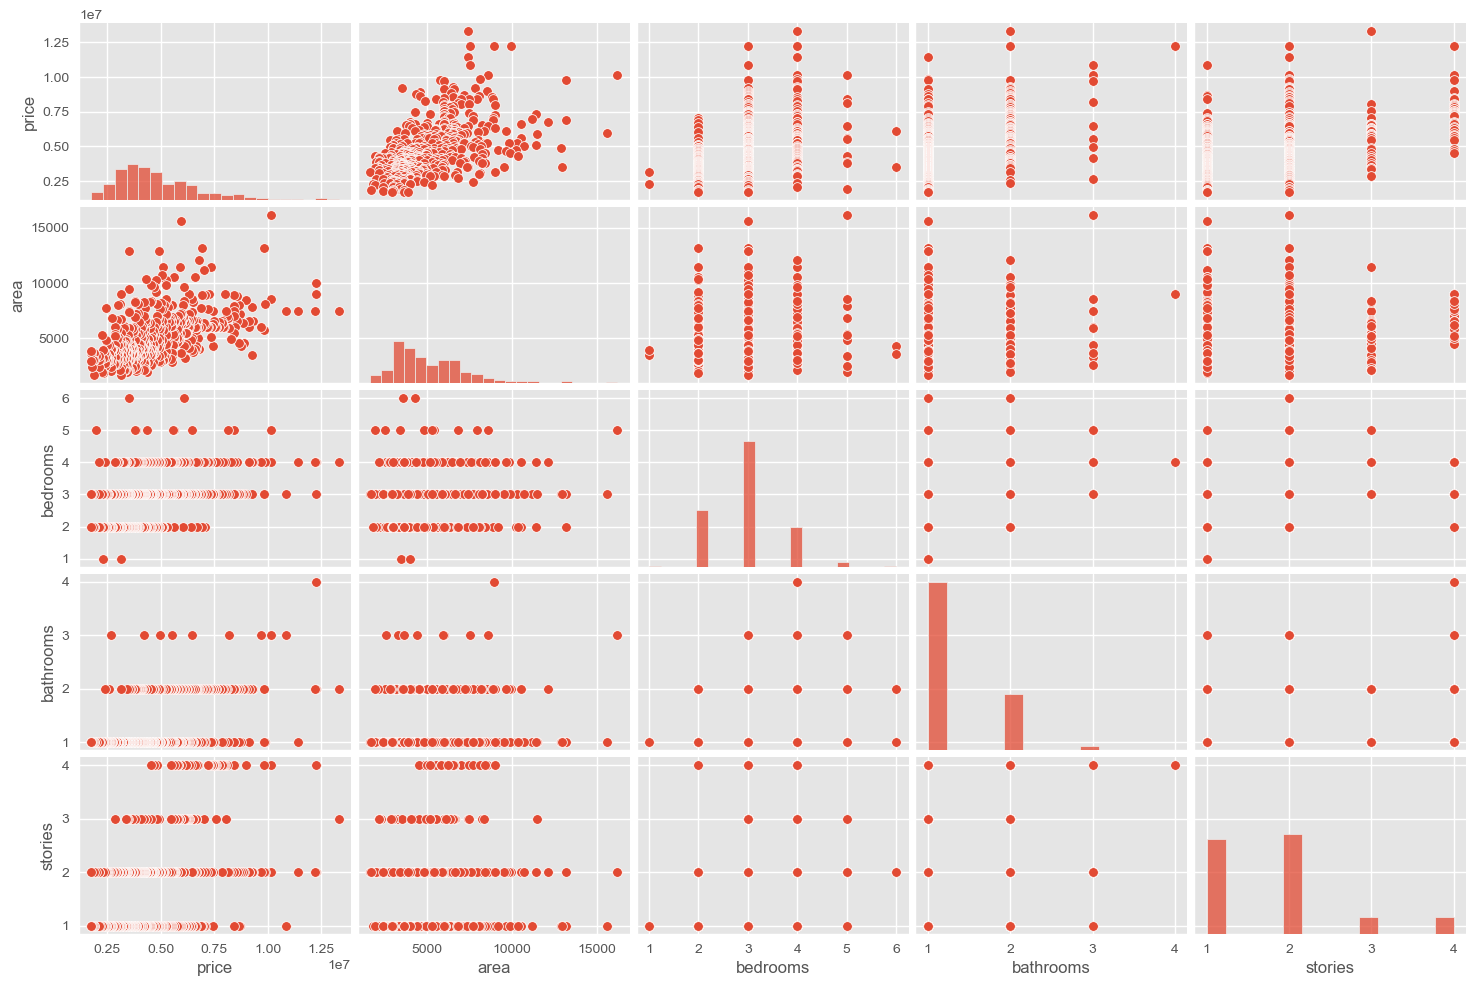

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns to plot
subset = house_pricing[['price', 'area', 'bedrooms', 'bathrooms', 'stories']]

# Create the pair plot with adjusted plot size
sns.pairplot(subset, height=2, aspect=1.5)
plt.show();


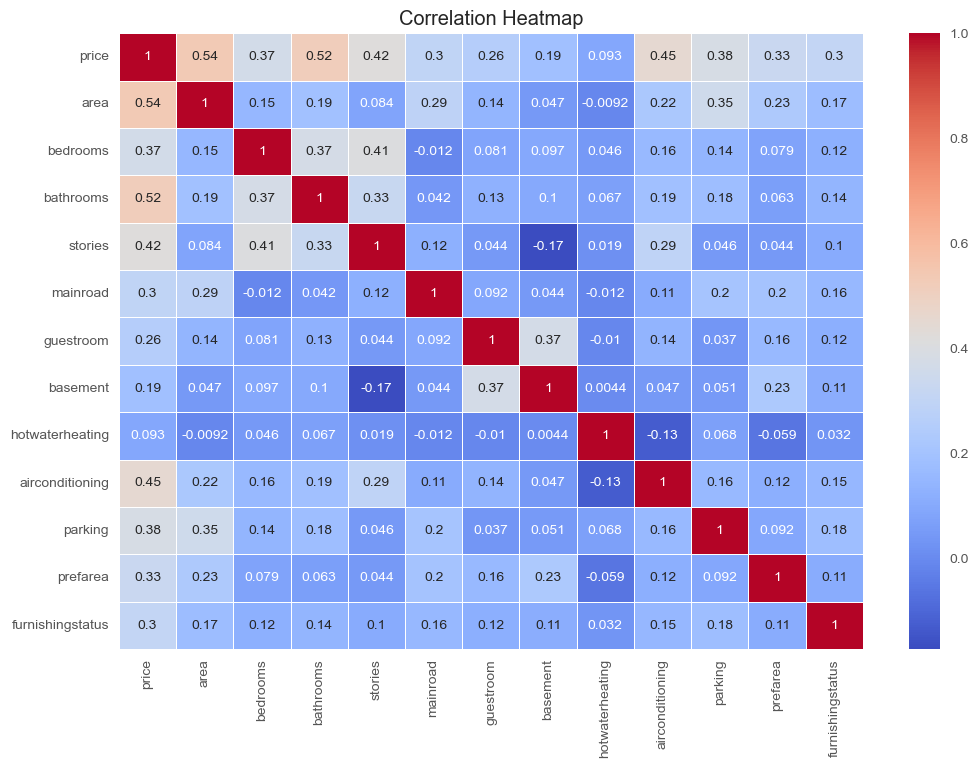

In [30]:
#Heatmap
cor_matrix= house_pricing[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

#### Turning the categorical columns into numerical columns 

In [31]:
#Splitting Data into X and Y
x = house_pricing.drop("price",axis=1)
y = house_pricing["price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["mainroad","guestroom","hotwaterheating","basement","airconditioning","prefarea","furnishingstatus"]
one_hot = OneHotEncoder()                                  
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                 categorical_features)],
                               remainder = "passthrough")  
transformed_x = transformer.fit_transform(x)  
transformed_x


array([[0., 1., 1., ..., 2., 3., 2.],
       [0., 1., 1., ..., 4., 4., 3.],
       [0., 1., 1., ..., 2., 2., 2.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 2., 0.]])

In [32]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7420.0,4.0,2.0,3.0,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,8960.0,4.0,4.0,4.0,3.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,9960.0,3.0,2.0,2.0,2.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7500.0,4.0,2.0,2.0,3.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7420.0,4.0,1.0,2.0,2.0


In [33]:
house_pricing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


#### Splitting The Data Into Training And Testing

In [34]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Assuming house_pricing is your DataFrame
X = house_pricing.drop('price', axis=1)
y = house_pricing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Model Selection and Training

**Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression RMSE: 1331071.4167895103
Linear Regression R2: 0.6494754192267806


**Random Forest Regressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Random Forest R2:", r2_score(y_test, y_pred))


Random Forest RMSE: 1398901.4195830664
Random Forest R2: 0.612840442148196


#### Hyperparameter Tuning

**For Random Forest**

In [37]:
#Use GridSearchCV to find the best hyperparameters for the models.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Tuned Random Forest RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Tuned Random Forest R2:", r2_score(y_test, y_pred))


Tuned Random Forest RMSE: 1433407.1346801259
Tuned Random Forest R2: 0.5935053004295198


**For Linear Regression**

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Define the hyperparameters and their values to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [None, 100, 1000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

# Train the model with the best parameters
best_ridge = Ridge(**best_params)
best_ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_ridge.predict(X_test)
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Ridge Regression R2:", r2_score(y_test, y_pred))


Best Parameters: {'alpha': 1.0, 'fit_intercept': False, 'max_iter': None, 'solver': 'auto', 'tol': 0.001}
Best Score (MSE): 1060160512796.4443
Ridge Regression RMSE: 1335459.0328438627
Ridge Regression R2: 0.6471607393944729
